In [156]:
#Once you've simulated stock prices using Brownian Motion (typically via Geometric Brownian Motion, or GBM), 
#you can use those synthetic price paths for several valuable applications in trading, risk management,
#and strategy development.

#1. 🧪 Backtest Trading Strategies
#Use the simulated prices as a testbed for your strategy:

#Moving average crossover

#Mean reversion

#reakout systems

#This helps you understand:

#Whether your strategy is robust or just curve-fitted to real data

#How it behaves in random or volatile markets

# Apply a simple moving average strategy to simulated prices

#2. 🎲 Monte Carlo Simulation
#Run many simulations to:

#Estimate the probability of ruin

#Calculate Value at Risk (VaR)

#Forecast future price ranges

#Simulate portfolio returns

# Simulate 10,000 possible price paths
# Calculate the 5% worst-case loss (VaR)

#3. 📊 Estimate Option Prices
#Use simulated prices to:

#Price European/American options using the expected payoff

#Compare to Black-Scholes prices

#Estimate Greeks numerically (delta, gamma, etc.)

# Option payoff = max(S_T - K, 0)
# Estimate expected payoff over simulations

#4. ⚠️ Stress Test Portfolios
#Simulate extreme but plausible price movements to:

#Check how your portfolio would react

#Examine correlation breakdowns

#Model liquidity shocks

#5. 🧮 Compare Real vs Simulated Behavior
#Is the real market more volatile than the model?

#Do trends emerge more or less than in random walk models?

#Helps refine your assumptions and models.

#. 🔍 Visualize Price Distributions
#See how randomness and volatility affect price evolution.

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

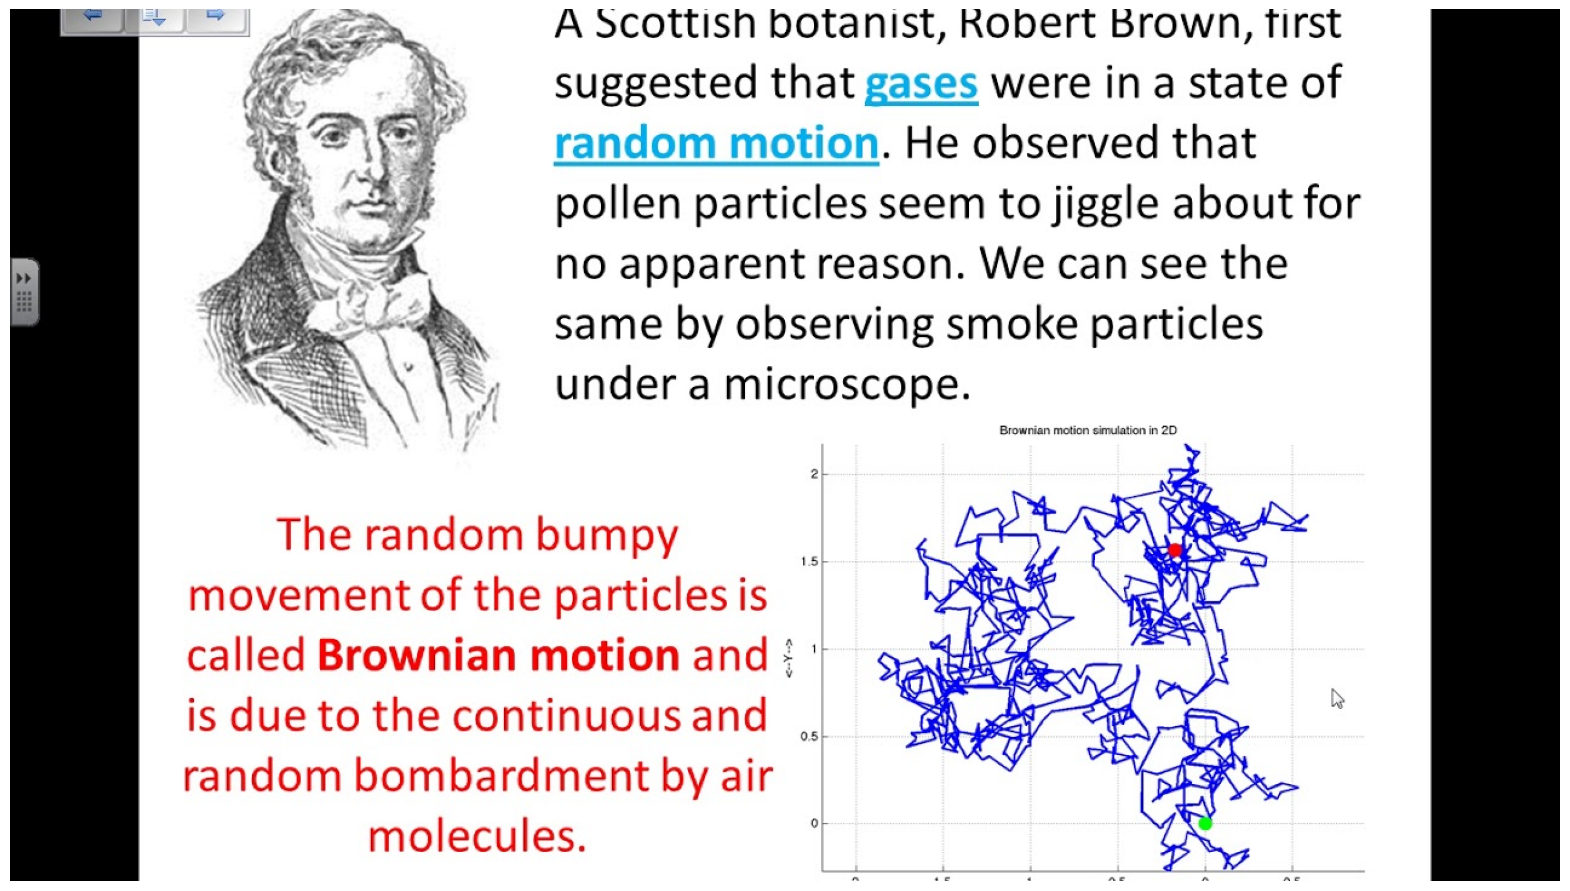

In [158]:
plt.figure(figsize = (20,20))
pic=plt.imread("C:\\Windows\\Temp\\maxresdefault.jpg")
plt.imshow(pic)
plt.axis('off')
plt.show()

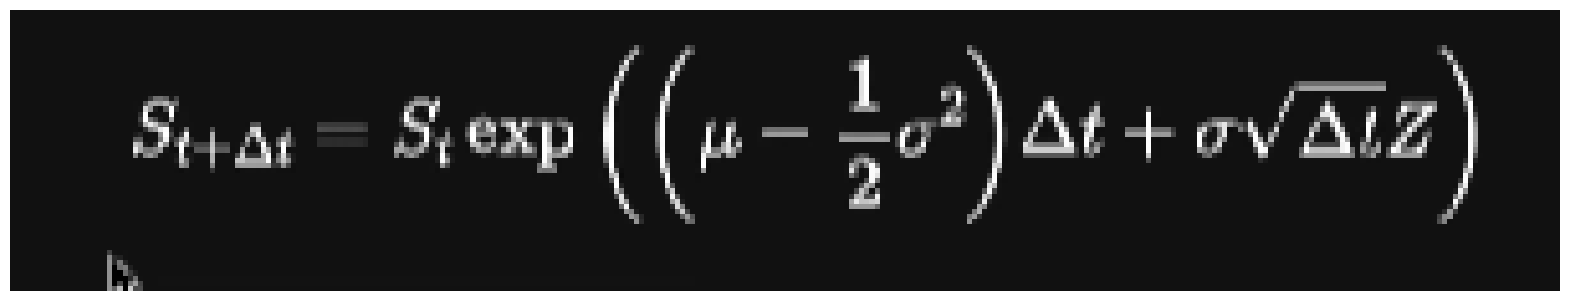

In [159]:
plt.figure(figsize = (20,20))
pic=plt.imread("C:\\Windows\\Temp\\Screenshot 2025-07-24 225320.png")
plt.imshow(pic)
plt.axis('off')
plt.show()

In [160]:
STOCK_TICKER='AAPL'
DAYS_FOR_ESTIMATION=252
FUTURE_YEARS_TO_SIMULATE=1
SIMULATIONS=100

prices=yf.download(STOCK_TICKER,period=f'{DAYS_FOR_ESTIMATION}d',interval='1d')['Close']
prices

C:\Users\user\AppData\Local\Temp\ipykernel_7428\32175739.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices=yf.download(STOCK_TICKER,period=f'{DAYS_FOR_ESTIMATION}d',interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-07-23,223.962585
2024-07-24,217.522705
2024-07-25,216.477615
2024-07-26,216.945419
2024-07-29,217.224121
...,...
2025-07-18,211.179993
2025-07-21,212.479996
2025-07-22,214.399994


In [161]:
log_returns=np.log(prices/prices.shift(1)).dropna()
log_returns

Ticker,AAPL
Date,
2024-07-24,-0.029176
2024-07-25,-0.004816
2024-07-26,0.002159
2024-07-29,0.001284
2024-07-30,0.002563
...,...
2025-07-18,0.005508
2025-07-21,0.006137
2025-07-22,0.008996


In [162]:
mu=(log_returns.mean()*252).item()
mu

-0.04151749416634843

In [163]:
sigma=(log_returns.std()*np.sqrt(252)).item()
sigma

0.3150041921599077

In [164]:
s0=prices.iloc[-1].item()
s0

214.88999938964844

In [165]:
dt=1/252
num_steps=int(FUTURE_YEARS_TO_SIMULATE/dt)
num_steps

252

In [166]:
Z=np.random.standard_normal((num_steps,SIMULATIONS))
Z

array([[ 0.9605056 , -0.57933584, -0.36408696, ..., -0.81037828,
         0.35155166,  0.61678873],
       [-0.06775329,  1.16631575,  0.54178171, ...,  0.59409015,
        -1.67953135, -1.48635518],
       [-0.21365365,  0.00364768, -1.47680346, ..., -0.91359058,
        -1.72158874, -1.35033635],
       ...,
       [-0.18574176,  0.50428837,  0.30891869, ..., -1.01607815,
         2.0777329 ,  0.28878369],
       [ 0.04216657,  0.42994229, -1.79055554, ...,  0.68056688,
        -1.72335084, -0.44760827],
       [-0.54141354, -0.22636814,  0.70531672, ..., -0.45248664,
        -1.03011227, -1.25719521]], shape=(252, 100))

In [167]:
daily_factors=np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z)
daily_factors

array([[1.01887397, 0.9882124 , 0.99244235, ..., 0.98369214, 1.00663627,
        1.01194837],
       [0.99829537, 1.02304353, 1.01044331, ..., 1.01149267, 0.96687192,
        0.97058532],
       [0.99540932, 0.99971079, 0.9707693 , ..., 0.98167952, 0.96606534,
        0.97320854],
       ...,
       [0.9959608 , 1.00969183, 1.00578503, ..., 0.97968511, 1.04171423,
        1.00538326],
       [1.00047521, 1.00820335, 0.96474415, ..., 1.01322988, 0.96603156,
        0.99079889],
       [0.98895632, 0.99515821, 1.01372762, ..., 0.99070298, 0.97941232,
        0.97500892]], shape=(252, 100))

In [168]:
price_paths=np.zeros((num_steps+1,SIMULATIONS))
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(253, 100))

In [169]:
price_paths[0,:]=s0
price_paths

array([[214.88999939, 214.88999939, 214.88999939, ..., 214.88999939,
        214.88999939, 214.88999939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]], shape=(253, 100))

In [170]:
for t in range(1,num_steps+1):
    price_paths[t,:]=price_paths[t-1,:]*daily_factors[t-1,:]
price_paths

array([[214.88999939, 214.88999939, 214.88999939, ..., 214.88999939,
        214.88999939, 214.88999939],
       [218.94582616, 212.35696207, 213.26593572, ..., 211.38560443,
        216.3160676 , 217.45758479],
       [218.57260384, 217.25041591, 215.49313864, ..., 213.81499042,
        209.14993169, 211.06113862],
       ...,
       [145.74317918, 170.23411774, 225.04809728, ..., 103.05725709,
        179.36508086, 146.15390835],
       [145.81243761, 171.63060757, 217.11383581, ..., 104.42069207,
        173.27232959, 144.80913015],
       [144.2021313 , 170.79960888, 220.09429185, ..., 103.44989102,
        169.70505427, 141.19019373]], shape=(253, 100))

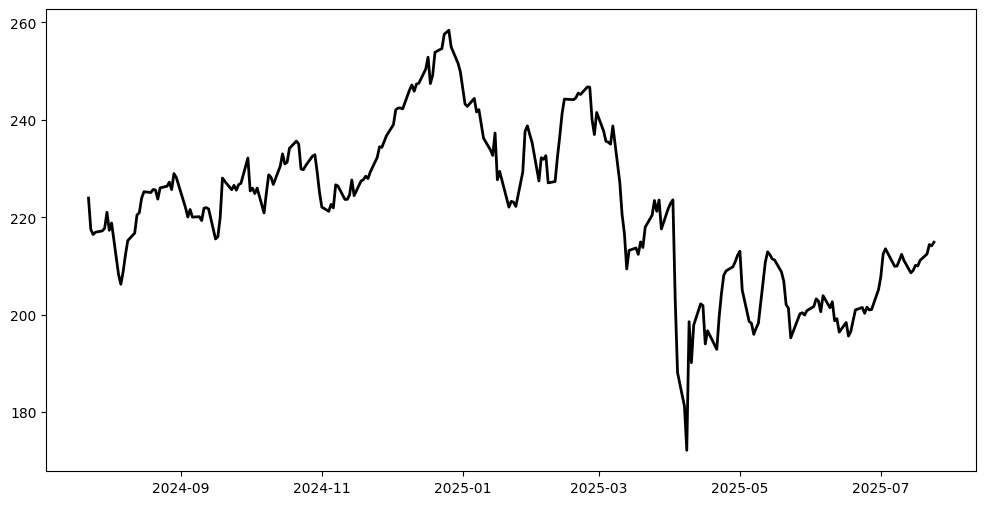

In [171]:
plt.figure(figsize=(12,6))
historical_dates=prices.index
plt.plot(historical_dates,prices,label='Historical Price',color='black',linewidth=2)

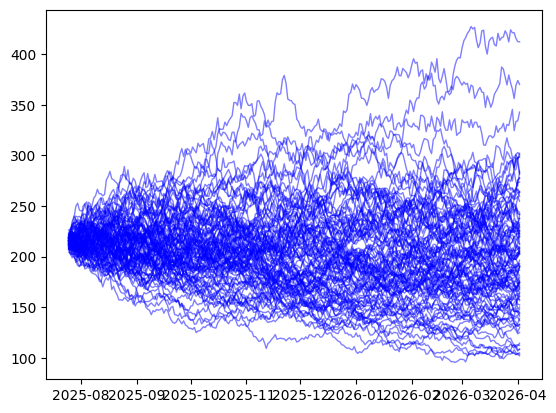

In [172]:
last_historical_dates=prices.index[-1]
future_dates=pd.date_range(start=last_historical_dates,periods=num_steps+1)[1:]
plt.plot(future_dates,price_paths[1:,:],lw=1,alpha=0.5,color='blue')

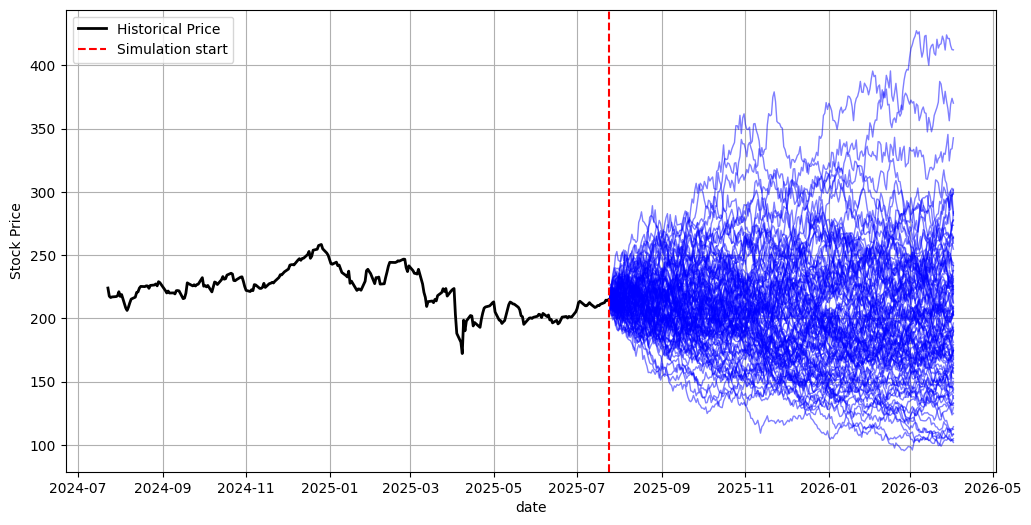

In [173]:
plt.figure(figsize=(12,6))
historical_dates=prices.index
plt.plot(historical_dates,prices,label='Historical Price',color='black',linewidth=2)
last_historical_dates=prices.index[-1]
future_dates=pd.date_range(start=last_historical_dates,periods=num_steps+1)[1:]
plt.plot(future_dates,price_paths[1:,:],lw=1,alpha=0.5,color='blue')
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.axvline(last_historical_dates,color='red',linestyle='--',label='Simulation start')
plt.legend()

In [174]:
pd.DataFrame(price_paths)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,...,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999,214.889999
1,218.945826,212.356962,213.265936,206.861096,209.048253,207.931792,210.431587,204.264208,215.294410,216.174301,...,214.340299,210.174296,217.270538,209.988818,215.352827,216.197786,218.448308,211.385604,216.316068,217.457585
2,218.572604,217.250416,215.493139,213.256099,203.945563,202.178757,213.842854,203.269585,213.170626,225.415253,...,206.990733,209.731315,214.469369,215.913051,214.243179,217.902186,213.006251,213.814990,209.149932,211.061139
3,217.569208,217.187585,209.194123,217.710119,204.779735,203.309375,211.249538,201.899125,209.863247,234.895931,...,205.600396,210.575791,219.107103,212.637082,216.497970,219.808235,211.582929,209.897798,202.052500,205.406502
4,211.433085,222.223626,205.917460,223.883365,212.998164,201.821761,205.630763,202.345379,213.365954,239.923903,...,208.889396,212.511425,218.679589,212.534208,211.693956,217.436369,209.857065,217.310259,203.200777,202.343215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,150.994400,162.732087,227.208042,296.066121,160.542350,104.801613,142.302644,365.577950,139.851538,264.000304,...,186.268746,252.459875,215.231681,165.181793,152.074716,253.106044,115.561623,105.096374,170.257758,148.336437
249,146.334253,168.600075,223.753675,287.853983,158.518181,108.036008,141.096082,356.145285,133.905048,264.970887,...,183.241350,252.182986,219.929024,164.374364,154.507949,245.193715,112.078186,105.194267,172.182616,145.371337
250,145.743179,170.234118,225.048097,296.886641,162.401467,105.015579,149.095434,369.202659,131.814440,267.556691,...,186.455783,248.790654,217.096340,158.905000,157.112680,247.222966,109.721575,103.057257,179.365081,146.153908
251,145.812438,171.630608,217.113836,291.586934,163.924463,103.347911,145.174753,373.892858,131.618354,273.305380,...,185.365716,242.043800,215.711603,157.245482,148.181485,237.157061,106.724178,104.420692,173.272330,144.809130
